# **Data**

For our exercises we will use two different datasets:
- The AG News subset that features english news articles of 4 different categories
- The 10kGNAD dataset that features german news articles of 9 different categories

In [1]:
import csv
import pandas as pd

# english data
classes_en = {1: "World", 2: "Sports", 3: "Business", 4: "Sci/Tech"}
train_en = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/AGNews/train.csv", 
                       names = ["Label", "Title", "Article"],
                       encoding = "utf-8")
test_en = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/AGNews/test.csv", 
                      names = ["Label", "Title", "Article"],
                      encoding = "utf-8")

# german data
train_de = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/10kGNAD/train.csv", 
                       sep = ";", names = ["Label", "Article"], 
                       quotechar = "\'", quoting = csv.QUOTE_MINIMAL, encoding = "utf-8")
test_de = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/10kGNAD/test.csv", 
                       sep = ";", names = ["Label", "Article"], 
                       quotechar = "\'", quoting = csv.QUOTE_MINIMAL, encoding = "utf-8")

### The english dataset features 120 000 training and 7600 test samples with equally balanced classes

In [2]:
print(train_en.shape)
print(test_en.shape)
train_en.head()

(120000, 3)
(7600, 3)


,Label,Title,Article
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


<Axes: xlabel='Label'>

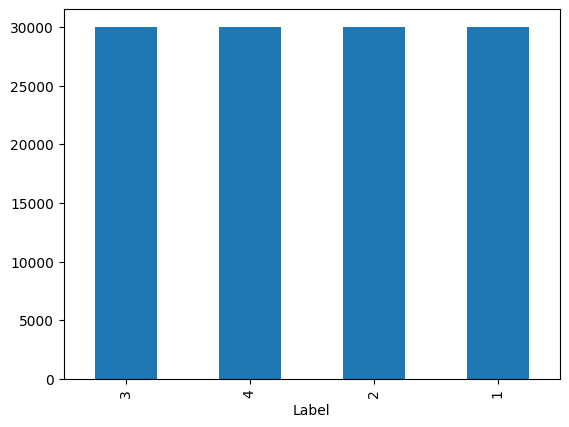

In [3]:
train_en["Label"].value_counts().plot(kind = "bar")

### The german dataset features 9245 training and 1028 test samples with rather unbalanced classes

In [4]:
print(train_de.shape)
print(test_de.shape)
train_de.head()

(9245, 2)
(1028, 2)


,Label,Article
0,Sport,21-Jähriger fällt wohl bis Saisonende aus. Wie...
1,Kultur,"Erfundene Bilder zu Filmen, die als verloren g..."
2,Web,Der frischgekürte CEO Sundar Pichai setzt auf ...
3,Wirtschaft,"Putin: ""Einigung, dass wir Menge auf Niveau vo..."
4,Inland,Estland sieht den künftigen österreichischen P...


<Axes: xlabel='Label'>

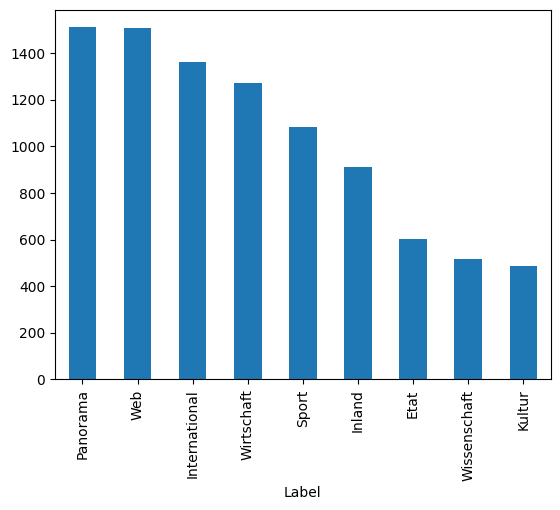

In [5]:
train_de["Label"].value_counts().plot(kind = "bar")

# **spaCy**

spaCy is a natural language processing library that comes with many built-in features that solve core linguistic tasks.  
The following exercises should be carried out by getting familiar with the spaCy API. The documentation can be found at:

[https://spacy.io/usage](https://spacy.io/usage)

spaCy needs a language model to analyze text, we will work with both the english and the german language models which can be downloaded by executing the following:

In [6]:
%%capture output
!python -m spacy download en_core_web_sm

In [7]:
if "Download and installation successful" in output.stdout:
    print("Download and installation successful!")
else:
    print(output.stdout)
    print(output.stderr)

Download and installation successful!


In [8]:
%%capture output
!python -m spacy download en_core_web_lg

In [9]:
if "Download and installation successful" in output.stdout:
    print("Download and installation successful!")
else:
    print(output.stdout)
    print(output.stderr)

Download and installation successful!


In [10]:
%%capture output
!python -m spacy download de_core_news_sm

In [11]:
if "Download and installation successful" in output.stdout:
    print("Download and installation successful!")
else:
    print(output.stdout)
    print(output.stderr)

Download and installation successful!


In [12]:
%%capture output
!python -m spacy download de_core_news_lg

In [13]:
if "Download and installation successful" in output.stdout:
    print("Download and installation successful!")
else:
    print(output.stdout)
    print(output.stderr)

Download and installation successful!


### Loading models

In [14]:
import spacy
import random
import en_core_web_lg
import de_core_news_lg

nlp_en = en_core_web_lg.load()
nlp_de = de_core_news_lg.load()

### Use spaCy to tokenize a random Article of both the english and the german dataset

In [15]:
# select a random english article
r_en = random.randint(0, train_en.shape[0] - 1)
# your code here
# ...

In [16]:
# select a random german article
r_de = random.randint(0, train_de.shape[0] - 1)
# your code here
# ...

### Use spaCy to lemmatize a random Article of both the english and the german dataset

In [17]:
# your code here [en]

In [18]:
# your code here [de]

### Use spaCy for Part-Of-Speech tagging of a random Article of both the english and the german dataset

- Either print the token attributes or visualize them as a table!
- What do the attributes describe?
- Visualize the POS attribute as a dependency plot with spaCy's displacy!
- Optional: For the german dataset visualize sentences separately for better readability.

In [19]:
# your code here [en]

In [20]:
from spacy import displacy

# your code here [en]

In [21]:
# your code here [de]

In [22]:
# your code here [de]

### Use spaCy for Named Entity Recognition (NER) of a random Article of both the english and the german dataset

- Either print the entity attributes or visualize them as a table!
- Visualize the entities as an entity plot with spaCy's displacy!

In [23]:
# your code here [en]

In [24]:
# your code here [en]

In [25]:
# your code here [de]

In [26]:
# your code here [de]

### We can also use spaCy to calculate the similarity between a german and an english article

- Read also: [https://spacy.io/usage/spacy-101#vectors-similarity](https://spacy.io/usage/spacy-101#vectors-similarity)

In [29]:
tokens_de.similarity(tokens_en)

-0.03828550410754585

In [30]:
fruits = nlp_en("apple banana")
fruits[0].similarity(fruits[1])

0.6646700501441956

### spaCy also encodes documents and tokens as feature vectors (we might come back to this later on)

In [31]:
token = tokens_en[0]
print(token.vector.shape)
print(tokens_en.vector.shape)

(300,)
(300,)
